In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

dataset = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
# drop column that is unnecessary and have string values 
dataset.drop(['Year_of_Release', 'Developer', 'Publisher', 'Platform','Name', 'Genre','Rating', 'NA_Sales', 'EU_Sales', 'JP_Sales',  'Other_Sales'] , inplace=True, axis=1)
dataset = dataset.dropna()
dataset.head()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,82.53,76.0,51.0,8.0,322.0
2,35.52,82.0,73.0,8.3,709.0
3,32.77,80.0,73.0,8.0,192.0
6,29.80,89.0,65.0,8.5,431.0
7,28.92,58.0,41.0,6.6,129.0


In [ ]:
dataset['Critic_Class']=np.where(dataset['Critic_Score']>75,'1','0')
dataset['User_Class']=np.where(dataset['User_Score']>7.5, '1', '0')
dataset

<ipython-input-20-f492e3eab013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Critic_Class']=np.where(dataset['Critic_Score']>75,'1','0')
<ipython-input-20-f492e3eab013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['User_Class']=np.where(dataset['User_Score']>7.5, '1', '0')


,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Critic_Class,User_Class
0,82.53,76.0,51.0,8.0,322.0,1,1
2,35.52,82.0,73.0,8.3,709.0,1,1
3,32.77,80.0,73.0,8.0,192.0,1,1
6,29.80,89.0,65.0,8.5,431.0,1,1
7,28.92,58.0,41.0,6.6,129.0,0,0
...,...,...,...,...,...,...,...
16677,0.01,81.0,12.0,8.8,9.0,1,1
16696,0.01,80.0,20.0,7.6,412.0,1,1
16700,0.01,61.0,12.0,5.8,43.0,0,0
16706,0.01,60.0,12.0,7.2,13.0,0,0


In [ ]:
features = ['Critic_Class']

In [ ]:
X = dataset

y = dataset[features]
y

,Critic_Class
0,1
2,1
3,1
6,1
7,0
...,...
16677,1
16696,1
16700,0
16706,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Critic_Class'] = le.fit_transform(X['Critic_Class'])

y = le.transform(y)

<ipython-input-23-1a4513b3e402>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Critic_Class'] = le.fit_transform(X['Critic_Class'])
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Critic_Class,User_Class
0,1.000000,0.741176,0.436364,0.824176,0.029828,1.0,1.0
1,0.430320,0.811765,0.636364,0.857143,0.066129,1.0,1.0
2,0.396995,0.788235,0.636364,0.824176,0.017634,1.0,1.0
3,0.361003,0.894118,0.563636,0.879121,0.040053,1.0,1.0
4,0.350339,0.529412,0.345455,0.670330,0.011725,0.0,0.0


In [ ]:
# initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

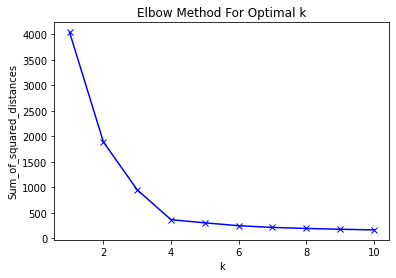

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

by the graph above, we can see that there is a kink before k = 2. That means k = 1 is  considered a good number of cluster to cluster this data

In [ ]:
y.size

7017

In [ ]:
kmeans = KMeans(n_clusters=1,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4189 out of 7017 samples were correctly labeled.
Accuracy score: 0.60


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


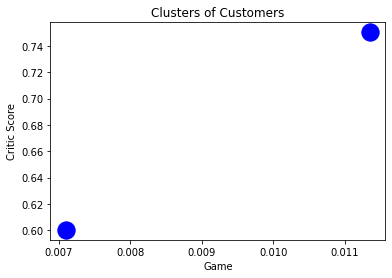

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Game')
plt.ylabel('Critic Score')
plt.show()